# Sarcasm Detector

`Sarcasm is “a sharp, bitter, or cutting expression or remark”. The use of irony to mock or convey contempt.`

### Import Libraries

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

# Importing text preprocessing NLP libraries
import nltk
nltk.download('stopwords')
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
#import contractions
from nltk.stem import SnowballStemmer


# Importing the deep learning libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

[nltk_data] Downloading package stopwords to C:\Users\Nichelle
[nltk_data]     Machado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading the dataset

In [2]:
df = pd.read_json("../Presentations/archive/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [4]:
df = df.drop(['article_link'],axis = 1)


In [5]:
df.head()

is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep. totally nails why congress is falling...
2             0  eat your veggies: 9 deliciously different recipes
3             1  inclement weather prevents liar from getting t...
4             1  mother comes pretty close to using word 'strea...

### Visualization

In [6]:
px.pie(df,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim', template='seaborn')

### Preprocessing the data

In [7]:
# Code to convert the headline into lowercase
df['headline']=df['headline'].str.lower()

# Code to remove the Special characters from the text 
df['headline']=df['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# Code to substitute the multiple spaces with single spaces
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Code to remove all the single characters in the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [8]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['headline_clean'] = df['headline'].apply(remove_stopwords)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

                                      headline_clean  
0  thirtysomething scientists unveil doomsday clo...  
1  dem rep totally nails congress falling short g...  
2        eat veggies 9 deliciously different recipes  
3       inclement weather prevents liar getting work  
4  mother comes pretty close using word streaming...

In [9]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['headline_clean'] = df['headline_clean'].apply(stemm_text)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

                                      headline_clean  
0  thirtysometh scientist unveil doomsday clock h...  
1  dem rep total nail congress fall short gender ...  
2                    eat veggi 9 delici differ recip  
3            inclement weather prevent liar get work  
4   mother come pretti close use word stream correct

### Wordcloud

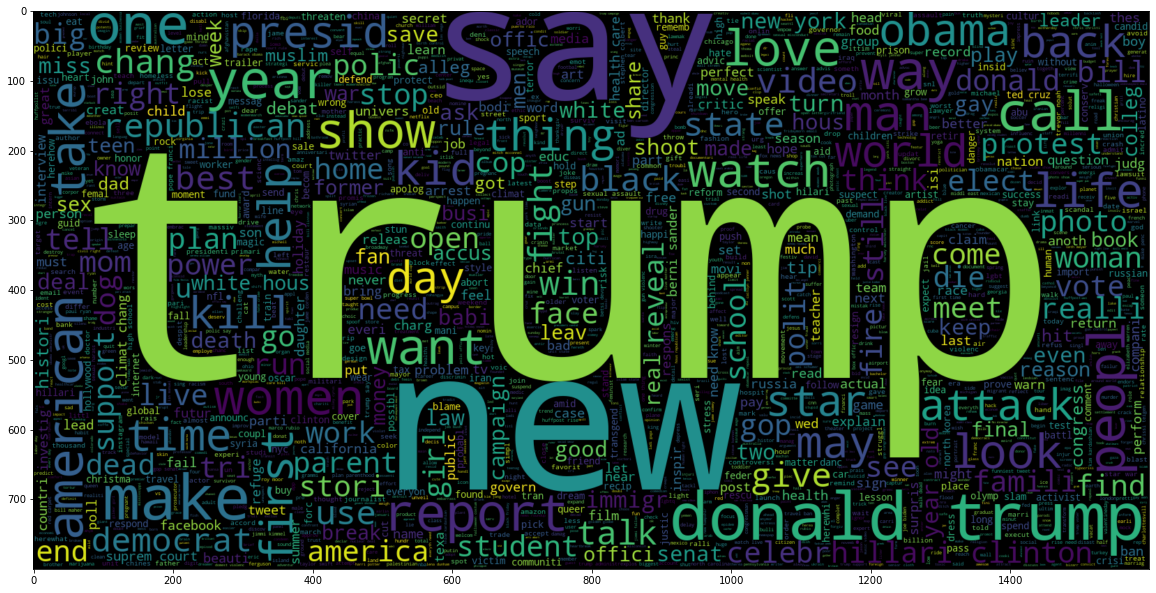

In [10]:
# Frequent words in Headlines that are NOT Sarcastic
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

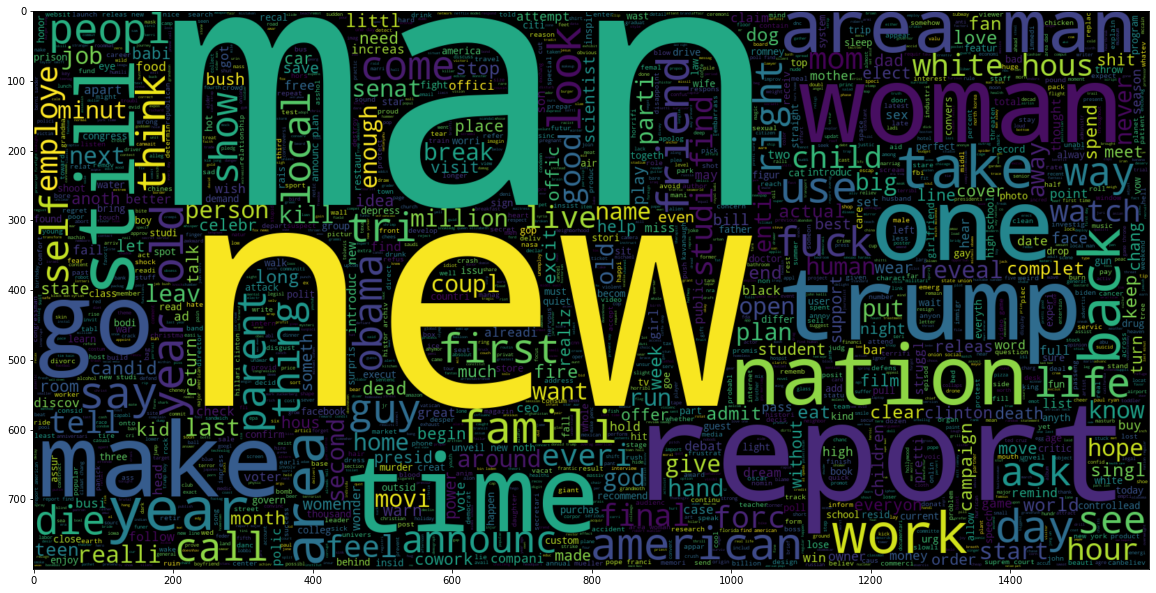

In [11]:
# Frequent words in Headline that are Sarcastic
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

### Spliting data into Train and Test sets

In [12]:
# Assigning X and y variables for feature and target columns
X = df['headline_clean']
y = df['is_sarcastic']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=1)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


22895 22895
5724 5724


### Tokenizing

In [36]:
vocab_size=10000
oov_token = "oov"
max_length = 100
embedding_dim=16

In [37]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token= oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [38]:
print(word_index)

{'oov': 1, 'new': 2, 'trump': 3, 'man': 4, 'year': 5, 'report': 6, 'get': 7, 'say': 8, 'make': 9, 'one': 10, 'american': 11, 'time': 12, 'area': 13, 'day': 14, 'donald': 15, 'woman': 16, 'like': 17, 'old': 18, 'show': 19, 'first': 20, 'peopl': 21, 'nation': 22, 'find': 23, 'way': 24, 'hous': 25, 'back': 26, 'take': 27, 'obama': 28, 'white': 29, 'look': 30, 'call': 31, 'thing': 32, 'still': 33, 'life': 34, 'go': 35, 'famili': 36, 'watch': 37, 'could': 38, 'women': 39, '5': 40, 'work': 41, 'clinton': 42, 'state': 43, 'live': 44, 'want': 45, 'use': 46, 'right': 47, 'world': 48, 'plan': 49, 'school': 50, 'studi': 51, 'come': 52, 'chang': 53, 'need': 54, 'kill': 55, 'would': 56, 'give': 57, 'love': 58, 'know': 59, 'black': 60, 'gop': 61, 'presid': 62, 'parent': 63, 'bill': 64, 'kid': 65, 'video': 66, '3': 67, 'tell': 68, 'mom': 69, 'home': 70, 'talk': 71, 'star': 72, 'friend': 73, 'last': 74, 'think': 75, '10': 76, '2': 77, 'best': 78, 'tri': 79, 'realli': 80, 'ask': 81, 'dead': 82, 'polic'

In [42]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,padding='pre', maxlen=max_length, truncating='post')

In [43]:
print(training_padded)

[[   0    0    0 ...  505  870 4916]
 [   0    0    0 ... 9788 1088  946]
 [   0    0    0 ...  193 1391   12]
 ...
 [   0    0    0 ...  834  373  118]
 [   0    0    0 ... 4265  650  731]
 [   0    0    0 ...    1  692  901]]


In [17]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,padding='post', maxlen=max_length, truncating='post')

### Model building

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
num_epochs=11

In [23]:
training_padded = np.array(training_padded)
labels = np.array(y_train)
testing_padded = np.array(testing_padded)
test_labels = np.array(y_test)

In [24]:
history=model.fit(training_padded,labels,epochs=num_epochs,validation_data=(testing_padded,test_labels),verbose=2)

Epoch 1/11
716/716 - 1s - loss: 0.6877 - accuracy: 0.5424 - val_loss: 0.6721 - val_accuracy: 0.5522
Epoch 2/11
716/716 - 1s - loss: 0.5680 - accuracy: 0.7397 - val_loss: 0.5064 - val_accuracy: 0.7549
Epoch 3/11
716/716 - 1s - loss: 0.4146 - accuracy: 0.8162 - val_loss: 0.4561 - val_accuracy: 0.7858
Epoch 4/11
716/716 - 1s - loss: 0.3595 - accuracy: 0.8414 - val_loss: 0.4483 - val_accuracy: 0.7911
Epoch 5/11
716/716 - 1s - loss: 0.3239 - accuracy: 0.8587 - val_loss: 0.4785 - val_accuracy: 0.7802
Epoch 6/11
716/716 - 1s - loss: 0.2978 - accuracy: 0.8725 - val_loss: 0.4604 - val_accuracy: 0.7928
Epoch 7/11
716/716 - 1s - loss: 0.2779 - accuracy: 0.8832 - val_loss: 0.4799 - val_accuracy: 0.7891
Epoch 8/11
716/716 - 1s - loss: 0.2615 - accuracy: 0.8911 - val_loss: 0.4862 - val_accuracy: 0.7921
Epoch 9/11
716/716 - 1s - loss: 0.2470 - accuracy: 0.8975 - val_loss: 0.4992 - val_accuracy: 0.7905
Epoch 10/11
716/716 - 1s - loss: 0.2351 - accuracy: 0.9040 - val_loss: 0.5177 - val_accuracy: 0.7944

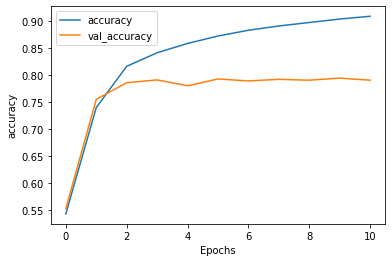

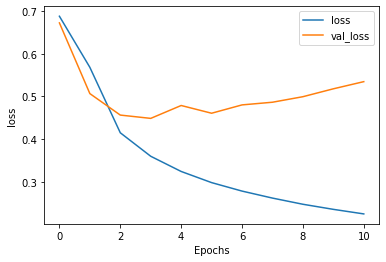

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**Source** : https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection<br>
         https://www.youtube.com/watch?v=Y_hzMnRXjhI&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=3